 # Home Work 2

In this hw assignment you have to train a classifier to distinguish between different food variations.


## But first... Theory
Solve the theoretical problems. Type the solutions here, using Latex

### Problem 1 (2 points)

Compute the result of convolution operation with kernel K to a matrix X.

Convolution params are: `stride=2`, `dilation=2`, `padding=1` (padding with zeros)

$
X = 
\begin{bmatrix}
    1 & 0 & -4 & 2 \\
    5 & 2 & 3 & 0 \\
    -1 & 0 & 1 & 4 \\
    0 & -3 & 2 & -1
\end{bmatrix}
\qquad
K =
\begin{bmatrix}
    2 & 1 \\
    -1 & -2
\end{bmatrix}
$

#### Convolution Operation with Kernel $K$ on Matrix $X$

We are given the input matrix
$$
X = \begin{bmatrix}
    1 & 0 & -4 & 2 \\
    5 & 2 & 3 & 0 \\
    -1 & 0 & 1 & 4 \\
    0 & -3 & 2 & -1
\end{bmatrix},
$$
and the kernel
$$
K = \begin{bmatrix}
2 & 1 \\
-1 & -2
\end{bmatrix}.
$$
The convolution parameters are:
* **Stride** $ s = 2 $
* **Dilation** $ d = 2 $
* **Padding** $ p = 1 $ (zero-padding)

##### Step 1: Padding

Padding $ X $ with a border of zeros gives the padded matrix $ X_p $:
$$
X_p = \begin{bmatrix}
0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & -4 & 2 & 0 \\
0 & 5 & 2 & 3 & 0 & 0 \\
0 & -1 & 0 & 1 & 4 & 0 \\
0 & 0 & -3 & 2 & -1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 
\end{bmatrix}.
$$

##### Step 2: Effective Kernel Size with Dilation

The dilation $ d=2 $ spreads the kernel elements. For a $ 2 \times 2 $ kernel, the effective size is:
$$
\text{Effective size} = (k-1) \cdot d + 1 = (2-1)\cdot 2 + 1 = 3.
$$
Thus, the kernel operates over a $ 3 \times 3 $ region of $ X_p $.

##### Step 3: Determining the Output Size

The output size is given by:
$$
\text{Output size} = \left\lfloor \frac{n + 2p - \text{effective kernel size}}{s} \right\rfloor + 1.
$$
After padding, the input becomes $ 6 \times 6 $ (since the original $ 4 \times 4 $ matrix becomes padded to size $ 4+2 \times 4+2 $):
$$
\text{Output dimension} = \left\lfloor \frac{6 - 3}{2} \right\rfloor + 1 = \lfloor 1.5 \rfloor + 1 = 1 + 1 = 2.
$$
Thus, the output matrix $ Y $ will be $ 2 \times 2 $.

##### Step 4: Convolution Computation

With dilation $ d=2 $, the positions for applying the kernel are:
$$
\begin{array}{rrll}
Y(i,j) =\;&& K(0,0)\,X_p(i\cdot s,& j\cdot s) \\
&+& K(0,1)\,X_p(i\cdot s,& j\cdot s+2) \\
&+& K(1,0)\,X_p(i\cdot s+2,& j\cdot s) \\
&+& K(1,1)\,X_p(i\cdot s+2,& j\cdot s+2).
\end{array}
$$

##### Output Element $ Y(0,0) $
Starting at position $(0,0)$:
$$
\begin{aligned}
Y(0,0) &= 2\cdot X_p(0,0) + 1\cdot X_p(0,2) \\
       &\qquad - 1\cdot X_p(2,0) - 2\cdot X_p(2,2) \\
       &= 2\cdot 0 + 1\cdot 0 -1\cdot 0 -2\cdot 2 \\
       &= -4.
\end{aligned}
$$

##### Output Element $ Y(0,1) $
Starting at position $(0,2)$:
$$
\begin{aligned}
Y(0,1) &= 2\cdot X_p(0,2) + 1\cdot X_p(0,4) \\
       &\qquad - 1\cdot X_p(2,2) - 2\cdot X_p(2,4) \\
       &= 2\cdot 0 + 1\cdot 0 -1\cdot 2 -2\cdot 0 \\
       &= -2.
\end{aligned}
$$

##### Output Element $ Y(1,0) $
Starting at position $(2,0)$:
$$
\begin{aligned}
Y(1,0) &= 2\cdot X_p(2,0) + 1\cdot X_p(2,2) \\
       &\qquad - 1\cdot X_p(4,0) - 2\cdot X_p(4,2) \\
       &= 2\cdot 0 + 1\cdot 2 -1\cdot 0 -2\cdot -3 \\
       &= 2 + 6 = 8.
\end{aligned}
$$

##### Output Element $ Y(1,1) $
Starting at position $(2,2)$:
$$
\begin{aligned}
Y(1,1) &= 2\cdot X_p(2,2) + 1\cdot X_p(2,4) \\
       &\qquad -1\cdot X_p(4,2) - 2\cdot X_p(4,4) \\
       &= 2\cdot 2 + 1\cdot 0 - 1\cdot -3 - 2\cdot -1 \\
       &= 4 + 0 + 3 + 2 = 9.
\end{aligned}
$$

##### Final Output

The resulting output of the convolution is:
$$
Y = \begin{bmatrix}
-4 & -2 \\
8 & 9
\end{bmatrix}.
$$


### Problem 2 (2 points)

Count the number of trainable params in nn:
```python
model = nn.Sequential(
    nn.Conv2d(
        in_channels=3, out_channels=16, kernel_size=5,
        stride=2, padding=0, dilation=1, bias=True
    ),
    nn.BatchNorm2d(num_features=16),
    nn.LeakyReLU(0.1),
    nn.Conv2d(
        in_channels=16, out_channels=32, kernel_size=5,
        stride=1, padding=1, dilation=2, bias=False
    ),
    nn.BatchNorm2d(num_features=32),
    nn.Sigmoid(),
)
```  

#### Solution

##### First Convolution Layer
- **Conv2d**: `in_channels=3`, `out_channels=16`, `kernel_size=5`, `bias=True`
 
The number of parameters is computed as:
$$ \text{params} = \text{out channels} \times \left( \text{in channels} \times (\text{kernel size})^2 \right) + \text{out channels}$$
$$ = 16 \times (3 \times 5^2) + 16 = 16 \times (3 \times 25) + 16 = 16 \times 75 + 16 = 1200 + 16 = 1216.$$

##### First Batch Normalization Layer
- **BatchNorm2d**: `num_features=16`.
 
This layer has two trainable parameters per feature (scale and shift):
$$\text{params} = 2 \times 16 = 32.$$

##### LeakyReLU
The LeakyReLU activation has no trainable parameters.

##### Second Convolution Layer
- **Conv2d**: `in_channels=16`, `out_channels=32`, `kernel_size=5`, `bias=False`
 
The number of parameters is:
$$\text{params} = 32 \times \left(16 \times 5^2 \right) = 32 \times (16 \times 25) = 32 \times 400 = 12800.$$

##### Second Batch Normalization Layer
- **BatchNorm2d**: `num_features=32`.
 
Trainable parameters:
$$\text{params} = 2 \times 32 = 64.$$

##### Sigmoid
The Sigmoid activation has no trainable parameters.

##### Total Trainable Parameters
Summing up the parameters:
$$ 1216 + 32 + 12800 + 64 = 14112.$$

Thus, the network has **14112** trainable parameters.

### Practical problem


Solve multicalss classification problem for Food101 dataset

####  Helper code

In [1]:
import copy
import random
import os
import shutil
import tarfile
from urllib.request import urlretrieve

import numpy as np
import pandas as pd
import cv2
from tqdm import tqdm

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

from torchvision import datasets, transforms, models
from torch.utils.data import random_split, DataLoader, Dataset
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [2]:
class TqdmUpTo(tqdm):
    def update_to(self, b=1, bsize=1, tsize=None):
        if tsize is not None:
            self.total = tsize
        self.update(b * bsize - self.n)

def download_url(url, filepath):
    directory = os.path.dirname(os.path.abspath(filepath))
    os.makedirs(directory, exist_ok=True)
    if os.path.exists(filepath):
        print("Filepath already exists. Skipping download.")
        return
    with TqdmUpTo(unit="B", unit_scale=True, unit_divisor=1024, miniters=1, 
                  desc=os.path.basename(filepath)) as t:
        urlretrieve(url, filename=filepath, reporthook=t.update_to, data=None)
        t.total = t.n

def extract_archive(filepath):
    extract_dir = os.path.dirname(os.path.abspath(filepath))
    shutil.unpack_archive(filepath, extract_dir)

In [4]:
url = "http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz"

In [3]:
dataset_directory = os.path.join(os.environ["HOMEPATH"], "datasets/food101")

In [9]:
filepath = os.path.join(dataset_directory, "food101.tar.gz")
download_url(
    url=url,
    filepath=filepath,
)
%time extract_archive(filepath)

food101.tar.gz: 100%|██████████| 4.65G/4.65G [07:13<00:00, 11.5MB/s]    


CPU times: total: 51.9 s
Wall time: 2min 56s


### Dataloaders (1 point)


In [4]:
NUM_WORKERS = os.cpu_count()

def split_data(dataset, val_size=0.2, seed=42):
    generator = torch.Generator().manual_seed(seed)
    train_len = int(len(dataset) * (1 - val_size))
    test_len = len(dataset) - train_len
    train_data, test_data = random_split(dataset, [train_len, test_len], generator=generator)
    return train_data, test_data


def create_dataloaders(data_dir: str,
                       train_transform: transforms.Compose,
                       val_transform: transforms.Compose,
                       batch_size: int,
                       num_workers: int = NUM_WORKERS):
    full_dataset = datasets.ImageFolder(root=data_dir)
    train_data, val_data = split_data(full_dataset)
    train_data.dataset.transform = train_transform
    val_data.dataset.transform = val_transform
    
    train_dataloader = DataLoader(
        train_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=num_workers,
        pin_memory=True,
    )
    val_dataloader = DataLoader(
        val_data,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
        pin_memory=True,
    )
    return train_dataloader, val_dataloader, full_dataset.classes

In [5]:
try:
    from torchinfo import summary
except:
    print("[INFO] Couldn't find torchinfo... installing it.")
    !pip install -q torchinfo
    from torchinfo import summary

In [6]:
from pathlib import Path
data_path = Path(dataset_directory)
image_path = data_path / "food-101" / "images"

Define transforms. You can add augmentations for better perfomance.

 You can either use Albumentation or torchvision

Don't forget to normalize images

In [7]:
train_transforms = transforms.Compose([
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

# Deterministic transforms for validation
val_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225]),
])

In [8]:
batch_size = 16
num_workers = 2

In [9]:
train_dataloader, test_dataloader, class_names = create_dataloaders(
    data_dir=str(image_path),
    train_transform=train_transforms,
    val_transform=val_transforms,
    batch_size=batch_size,
    num_workers=num_workers
)

 #### Train function (2 points)




In [10]:
from tqdm.auto import tqdm
from typing import Dict, List, Tuple

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device):
    model.train()
    running_loss = 0.0
    running_corrects = 0
    total_samples = 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model(X)
        loss = loss_fn(outputs, y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * X.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == y).item()
        total_samples += X.size(0)

    epoch_loss = running_loss / total_samples
    epoch_acc = running_corrects / total_samples
    return epoch_loss, epoch_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device):
    model.eval()
    running_loss = 0.0
    running_corrects = 0
    total_samples = 0

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            loss = loss_fn(outputs, y)
            running_loss += loss.item() * X.size(0)
            _, preds = torch.max(outputs, 1)
            running_corrects += torch.sum(preds == y).item()
            total_samples += X.size(0)

    epoch_loss = running_loss / total_samples
    epoch_acc = running_corrects / total_samples
    return epoch_loss, epoch_acc

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device,
          scheduler=None):
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}
    
    model.to(device)
    
    for epoch in range(epochs):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)
        
        print(f"Epoch: {epoch+1} | "
              f"train_loss: {train_loss:.4f} | "
              f"train_acc: {train_acc:.4f} | "
              f"test_loss: {test_loss:.4f} | "
              f"test_acc: {test_acc:.4f}")
        
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)
        
        if scheduler:
            scheduler.step()
        
        # Checkpoint
        torch.save({
            'epoch': epoch+1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': loss_fn.state_dict() if hasattr(loss_fn, 'state_dict') else None,
        }, f"{epoch+1}_iter.pth")
    
    return results

Choose a model

In [11]:
model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.IMAGENET1K_V1)
model.classifier[1] = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(model.classifier[1].in_features, 101)
)

Froze several layers or tune whole model

In [ ]:
# Optionally, freeze some layers:
# for param in model.parameters():
#     param.requires_grad = False
# model.fc.weight.requires_grad = True
# model.fc.bias.requires_grad = True

Model summary

In [12]:
from torchinfo import summary
summary(model,
        input_size=(32, 3, 224, 224),  # batch_size, channels, height, width
        verbose=0,
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"]
)

Layer (type (var_name))                                      Input Shape          Output Shape         Param #              Trainable
EfficientNet (EfficientNet)                                  [32, 3, 224, 224]    [32, 101]            --                   True
├─Sequential (features)                                      [32, 3, 224, 224]    [32, 1280, 7, 7]     --                   True
│    └─Conv2dNormActivation (0)                              [32, 3, 224, 224]    [32, 32, 112, 112]   --                   True
│    │    └─Conv2d (0)                                       [32, 3, 224, 224]    [32, 32, 112, 112]   864                  True
│    │    └─BatchNorm2d (1)                                  [32, 32, 112, 112]   [32, 32, 112, 112]   64                   True
│    │    └─SiLU (2)                                         [32, 32, 112, 112]   [32, 32, 112, 112]   --                   --
│    └─Sequential (1)                                        [32, 32, 112, 112]   [32, 16, 112

### Train (1 point)

In [13]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
n_epochs = 10

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("Using device:", device)

Using device: cuda


In [15]:
torch.manual_seed(42)
if device == 'cuda':
    torch.cuda.manual_seed(42)

from timeit import default_timer as timer
start_time = timer()

results = train(model=model,
                train_dataloader=train_dataloader,
                test_dataloader=test_dataloader,
                optimizer=optimizer,
                loss_fn=loss_fn,
                epochs=n_epochs,
                device=device,
                scheduler=scheduler)

end_time = timer()
print(f"[INFO] Total training time: {end_time-start_time:.3f} seconds")

Epoch: 1 | train_loss: 2.2088 | train_acc: 0.4458 | test_loss: 1.5263 | test_acc: 0.6086
Epoch: 2 | train_loss: 1.6173 | train_acc: 0.5818 | test_loss: 1.3578 | test_acc: 0.6483
Epoch: 3 | train_loss: 1.4808 | train_acc: 0.6143 | test_loss: 1.2679 | test_acc: 0.6704
Epoch: 4 | train_loss: 1.3907 | train_acc: 0.6338 | test_loss: 1.2121 | test_acc: 0.6914
Epoch: 5 | train_loss: 1.3237 | train_acc: 0.6508 | test_loss: 1.2030 | test_acc: 0.6920
Epoch: 6 | train_loss: 0.9046 | train_acc: 0.7571 | test_loss: 0.8942 | test_acc: 0.7730
Epoch: 7 | train_loss: 0.7659 | train_acc: 0.7914 | test_loss: 0.8832 | test_acc: 0.7795
Epoch: 8 | train_loss: 0.7002 | train_acc: 0.8072 | test_loss: 0.8689 | test_acc: 0.7798
Epoch: 9 | train_loss: 0.6497 | train_acc: 0.8190 | test_loss: 0.8772 | test_acc: 0.7793
Epoch: 10 | train_loss: 0.6116 | train_acc: 0.8288 | test_loss: 0.8796 | test_acc: 0.7826
[INFO] Total training time: 7989.750 seconds


### Results (2 points in total)
Plot train and val losses

Inference model on unique subset of images


It must be very obvious that you specificaly using images that model has never seen neither during training nor evaluation steps




#### Graphs (1 point)
Plot graphs for train and val loss



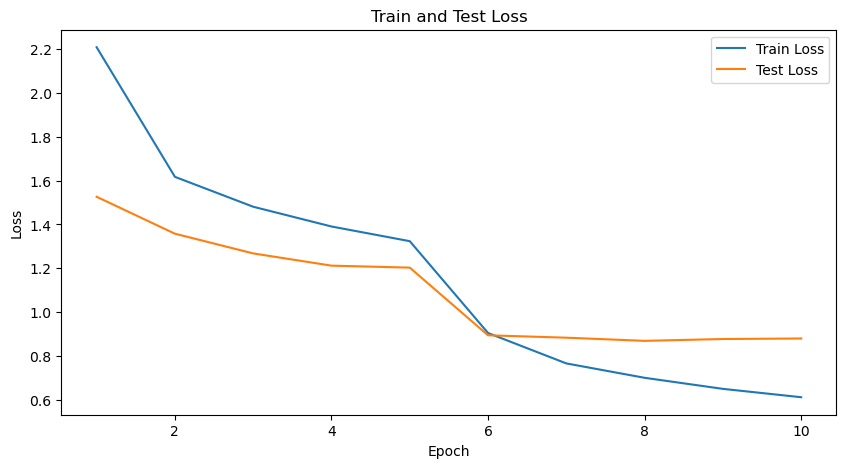

In [16]:
plt.figure(figsize=(10,5))
plt.plot(range(1, n_epochs+1), results["train_loss"], label="Train Loss")
plt.plot(range(1, n_epochs+1), results["test_loss"], label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Train and Test Loss")
plt.legend()
plt.show()

#### Demonstration (1 point)

Show model prediction on several images

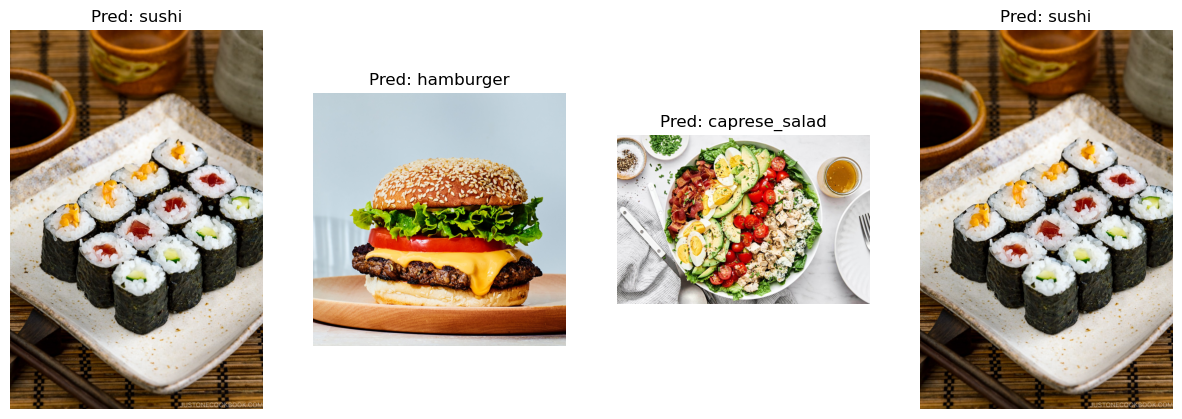

In [17]:
import os
import requests
import cv2
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

unseen_dir = os.path.join(dataset_directory, "unseen_images")
os.makedirs(unseen_dir, exist_ok=True)

# List of image URLs
food_image_urls = [
    "https://www.justonecookbook.com/wp-content/uploads/2020/01/Sushi-Rolls-Maki-Sushi-%E2%80%93-Hosomaki-1106-II.jpg",  # Sushi
    "https://www.simplyrecipes.com/thmb/IZKR8wzjPM_6ZRa16nbN5JkyZUg=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/__opt__aboutcom__coeus__resources__content_migration__simply_recipes__uploads__2016__09__Buttermilk-Waffles-horiz-a-2000-44a7abeb997c4b549d92576c3043bac7.jpg", # Waffles
    "https://dynamic-media-cdn.tripadvisor.com/media/photo-o/0e/a0/60/f3/salamina.jpg",#Pizza
]

def download_image(url, filename, timeout=30):
    """Download an image using requests with a specified timeout."""
    try:
        response = requests.get(url, stream=True, timeout=timeout)
        response.raise_for_status()
        with open(filename, 'wb') as f:
            for chunk in response.iter_content(1024):
                f.write(chunk)
        print(f"Downloaded {url} to {filename}")
    except Exception as e:
        print(f"Error downloading {url}: {e}")

# Download
for i, url in enumerate(food_image_urls):
    filename = os.path.join(unseen_dir, f"unseen_{i+1}.jpg")
    if not os.path.exists(filename):
        print(f"Downloading {url} to {filename}...")
        download_image(url, filename)


unseen_image_paths = [os.path.join(unseen_dir, fname)
                      for fname in os.listdir(unseen_dir)
                      if fname.lower().endswith(('.png', '.jpg', '.jpeg'))]
unseen_image_paths = unseen_image_paths[:10]


model.eval()
plt.figure(figsize=(15, 10))
for i, img_path in enumerate(unseen_image_paths):
    # Preprocessing
    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image, (224, 224))
    image_tensor = transforms.ToTensor()(image_resized)
    image_tensor = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                        std=[0.229, 0.224, 0.225])(image_tensor)
    image_tensor = image_tensor.unsqueeze(0).to(device)
    
    with torch.no_grad():
        outputs = model(image_tensor)
        _, pred = torch.max(outputs, 1)
        predicted_class = class_names[pred.item()]
    
    # Image + prediction
    plt.subplot(1, 4, i+1)
    plt.imshow(image)
    plt.title(f"Pred: {predicted_class}")
    plt.axis("off")
plt.show()
